In [32]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical

In [33]:
(xtrain,ytrain),(xtest,ytest)=load_data()


In [34]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [35]:
import matplotlib.pyplot as plt

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

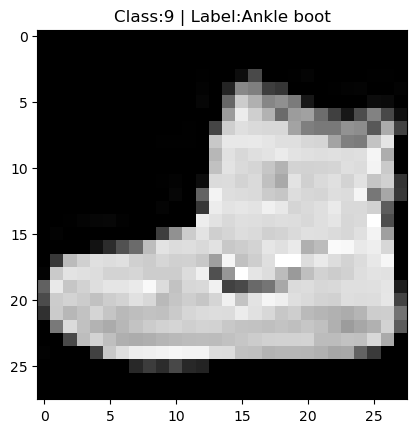

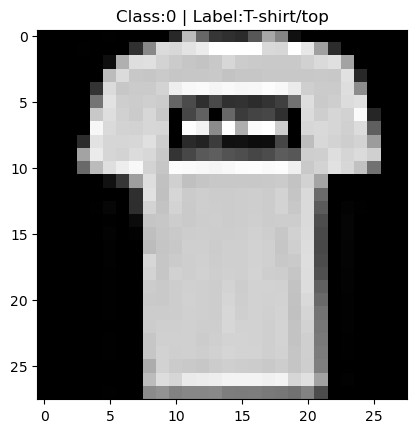

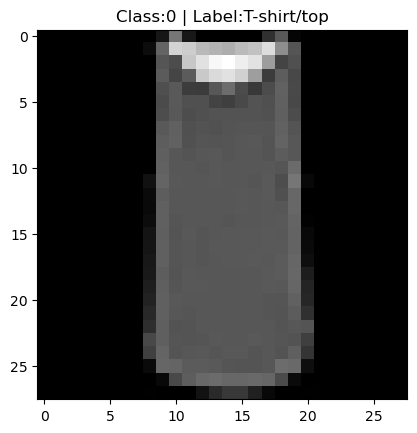

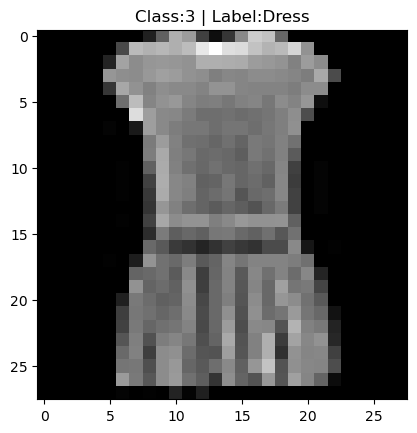

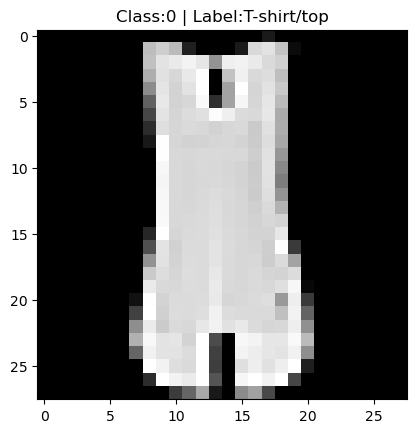

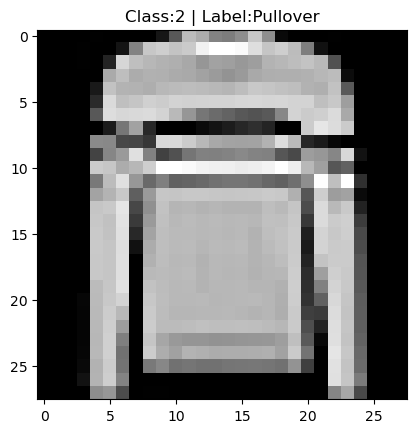

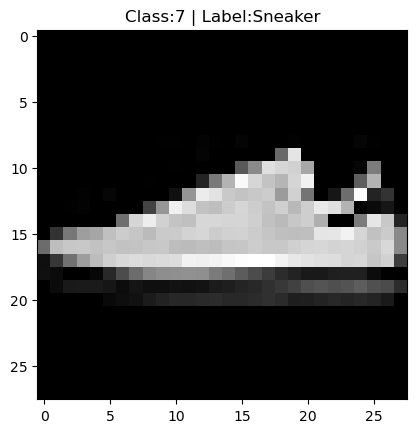

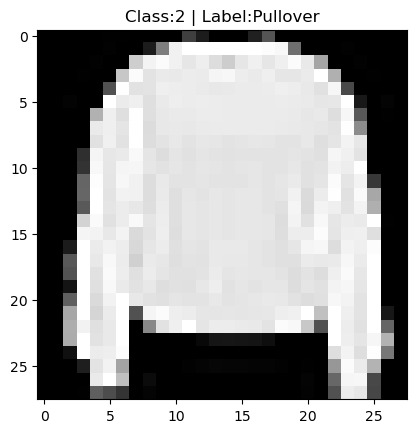

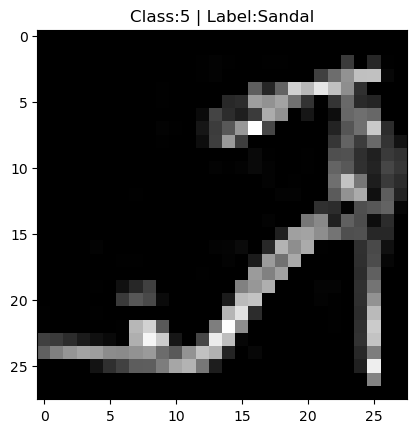

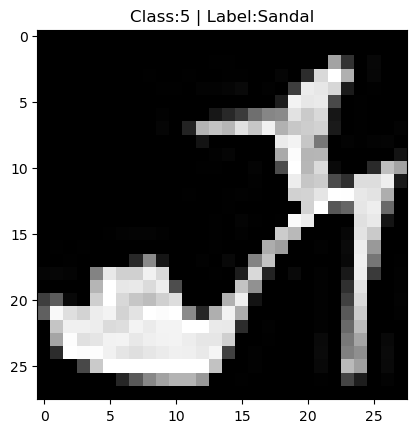

In [36]:
for i in range(10):
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f"Class:{str(ytrain[i])} | Label:{class_names[ytrain[i]]}")
    plt.show()

In [37]:
ytrain_ohe=to_categorical(ytrain)
y_test_ohe=to_categorical(ytest)

In [49]:
xtrain=xtrain.reshape(60000,28,28,1).astype('float')

In [50]:
xtest=xtest.reshape(10000,28,28,1).astype('float')

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
from tensorflow.keras.layers import Conv2D,Dense,Input,MaxPool2D,Activation,Flatten

In [53]:
model=Sequential()

In [54]:
model.add(Conv2D(filters=3,kernel_size=(5,5),strides=(1,1),padding="valid"))

In [55]:
model.add(Activation("relu"))

In [56]:
model.add(MaxPool2D(pool_size=(2,2)))

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(10,activation="softmax"))

In [59]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [60]:
model.fit(x=xtrain,y=ytrain_ohe,batch_size=1000,validation_data=(xtest,y_test_ohe),epochs=30)

Epoch 1/30
60/60 [==============================] - 9s 134ms/step - loss: 21.6053 - accuracy: 0.4176 - val_loss: 6.7131 - val_accuracy: 0.6265
Epoch 2/30
60/60 [==============================] - 9s 154ms/step - loss: 5.0147 - accuracy: 0.6653 - val_loss: 3.9874 - val_accuracy: 0.6811
Epoch 3/30
60/60 [==============================] - 9s 151ms/step - loss: 3.1860 - accuracy: 0.7027 - val_loss: 2.8180 - val_accuracy: 0.7050
Epoch 4/30
60/60 [==============================] - 9s 153ms/step - loss: 2.2997 - accuracy: 0.7260 - val_loss: 2.1485 - val_accuracy: 0.7239
Epoch 5/30
60/60 [==============================] - 9s 152ms/step - loss: 1.7799 - accuracy: 0.7414 - val_loss: 1.7402 - val_accuracy: 0.7382
Epoch 6/30
60/60 [==============================] - 10s 172ms/step - loss: 1.4457 - accuracy: 0.7531 - val_loss: 1.4423 - val_accuracy: 0.7471
Epoch 7/30
60/60 [==============================] - 10s 161ms/step - loss: 1.2169 - accuracy: 0.7626 - val_loss: 1.2356 - val_accuracy: 0.7563
Epo

In [61]:
import numpy as np
preds=model.predict(xtest)

313/313 [==============================] - 1s 3ms/step


In [79]:
preds

array([[1.18120136e-08, 5.79262380e-16, 1.31609275e-08, ...,
        1.54725322e-02, 3.78920886e-05, 9.77858245e-01],
       [2.05538445e-03, 9.91880134e-10, 9.73241746e-01, ...,
        1.11329339e-22, 3.50426330e-04, 2.03858530e-17],
       [4.44331754e-08, 9.99999881e-01, 6.77951931e-11, ...,
        9.33102083e-16, 3.68011732e-10, 1.99280222e-13],
       ...,
       [1.06233805e-04, 1.25489219e-13, 4.04038903e-04, ...,
        3.68744878e-12, 9.99441087e-01, 8.89391165e-12],
       [5.99488584e-11, 9.99999762e-01, 8.96049679e-10, ...,
        1.07792952e-12, 1.04978344e-11, 3.11472311e-12],
       [1.94602660e-04, 5.96488553e-11, 2.01539509e-03, ...,
        3.31408530e-03, 1.21881366e-02, 6.40432292e-04]], dtype=float32)

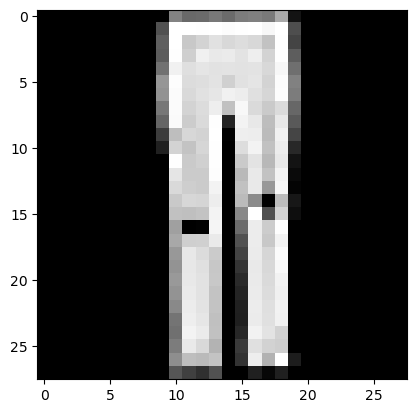

In [71]:
#testing using a random image from the dataset
plt.imshow(xtest[398].reshape(28,28),cmap='gray')

In [72]:
#testing using a random image from the dataset
class_names[np.argmax(preds[398])]

'Trouser'

In [74]:
#testing using a random image from the dataset
class_names[ytest[398]]

'Trouser'

In [76]:
from sklearn.metrics import classification_report

In [80]:
preds_class=np.argmax(preds,axis=1)

In [81]:
preds_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [82]:
print(classification_report(y_true=ytest,y_pred=preds_class))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.95      0.94      0.95      1000
           2       0.69      0.70      0.69      1000
           3       0.84      0.85      0.84      1000
           4       0.66      0.75      0.70      1000
           5       0.96      0.95      0.95      1000
           6       0.56      0.47      0.51      1000
           7       0.91      0.95      0.93      1000
           8       0.92      0.92      0.92      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

